# Intro to Data Visualization with Python


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

# New installed libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import dataframes
path = r"D:\0 - Data Analytics\4 - Python fundamentals for Data Analysts\Instacart Basket Analisys"

# Importing dataframes
ords_prods_merge = pd.read_pickle(
    os.path.join(path, "02 Data", "Prepared Data", "ords_prods_merge_V3.pkl")
)

## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

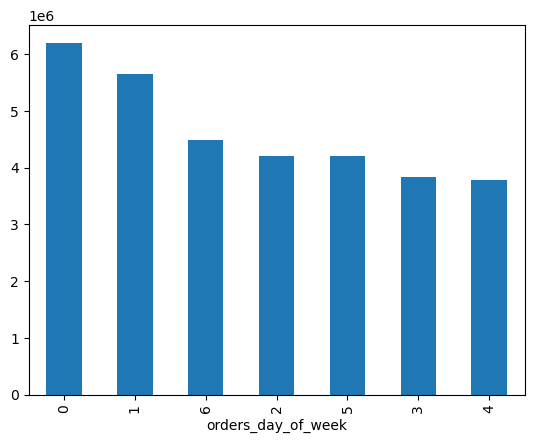

In [20]:
# Create Bar charts for orders_day_of_week
ords_prods_merge["orders_day_of_week"].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

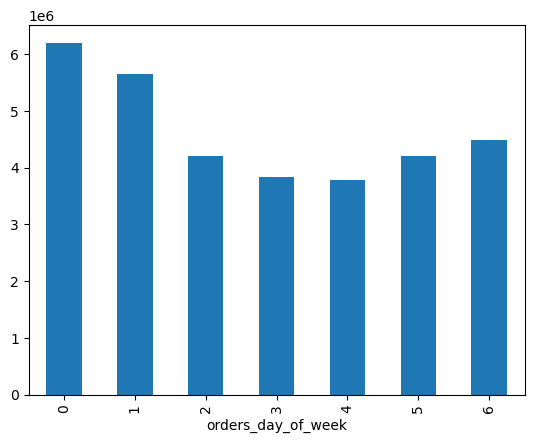

In [21]:
# Adding sort_index() to sort the values after the count, it can be used both in frequency tables and charts
ords_prods_merge["orders_day_of_week"].value_counts().sort_index().plot.bar()

In [22]:
# printing frequency table
ords_prods_merge["orders_day_of_week"].value_counts(dropna=False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [23]:
# printing frequency table sorted
ords_prods_merge["orders_day_of_week"].value_counts(dropna=False).sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

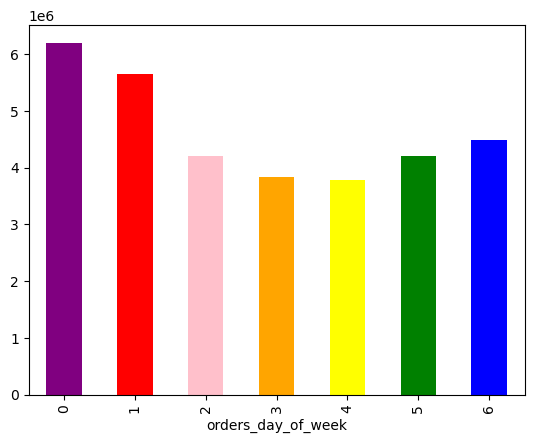

In [24]:
# Adding colors to the chart
ords_prods_merge["orders_day_of_week"].value_counts().sort_index().plot.bar(
    color=["purple", "red", "pink", "orange", "yellow", "green", "blue"]
)

## Exporting Charts
We first need to save it in a variable  and then we can export it

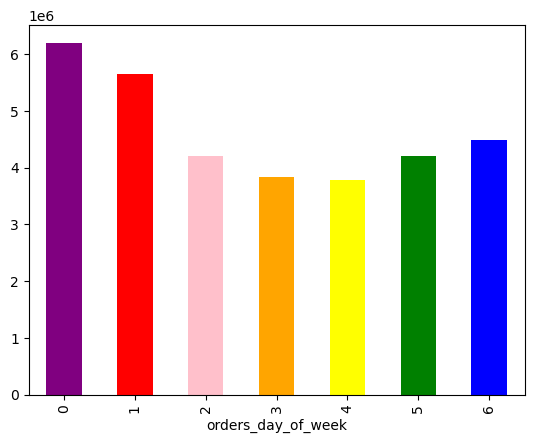

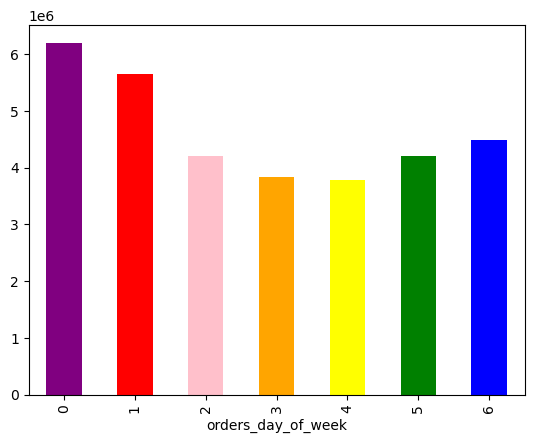

In [25]:
# Save the chart in a variable called bar
bar = (
    ords_prods_merge["orders_day_of_week"]
    .value_counts()
    .sort_index()
    .plot.bar(color=["purple", "red", "pink", "orange", "yellow", "green", "blue"])
)

# Canm access the chart by calling the variable.figure
bar.figure

In [26]:
# Save the chart as an image in the visualization folder

bar.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "bar_orders_dow.png")
)

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

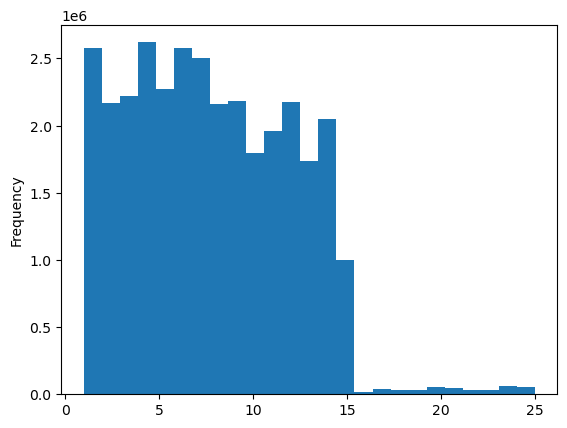

In [27]:
# Create a histogram for prices
ords_prods_merge["prices"].plot.hist(bins=25)

In [28]:
# describe the prices column
ords_prods_merge["prices"].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [29]:
# find mean of prices
ords_prods_merge["prices"].mean()


7.7909940921733645

In [30]:
# find median of prices
ords_prods_merge["prices"].median()

7.4

In [31]:
# find max of prices
ords_prods_merge["prices"].max()

25.0

The outlier of  99999.0 is making disappear the smaller bins

In [36]:
# Create a scatterplot prices x prices

# sns.scatterplot(x="prices", y="prices", data=ords_prods_merge)

In [33]:
# We now, want to see if there are values over $100, normal price for a sueprmarket. becasue the 20000 and 99999 outliers are werid for the dataset

# Since the dataset has many columns and rows to check it better we can use this code to show all columns and rows

# pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 200)  # Prevent line breaks
pd.set_option("display.max_colwidth", None)  # Prevent text truncation

ords_prods_merge.loc[ords_prods_merge["prices"] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_between_orders,order_frequency_flag


In [34]:
# We should ask the client on how to handle these outliers, meanwhile we will keep them in the dataset and trsnform them into NaN

# Moved this operation in script 4.8 before the exporting of the dataset

# Replace the values over 100 with NaN with np.nan
# ords_prods_merge.loc[ords_prods_merge["prices"] > 100, "prices"] = np.nan

In [35]:
# Check the max values again
ords_prods_merge["prices"].max()

25.0

<Axes: ylabel='Frequency'>

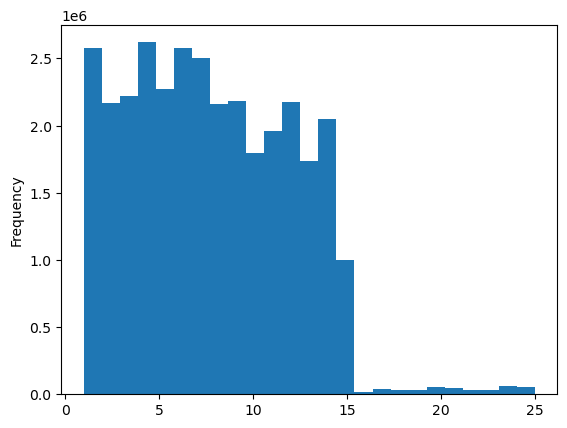

In [37]:
# Let's try again to create the histogram
ords_prods_merge["prices"].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

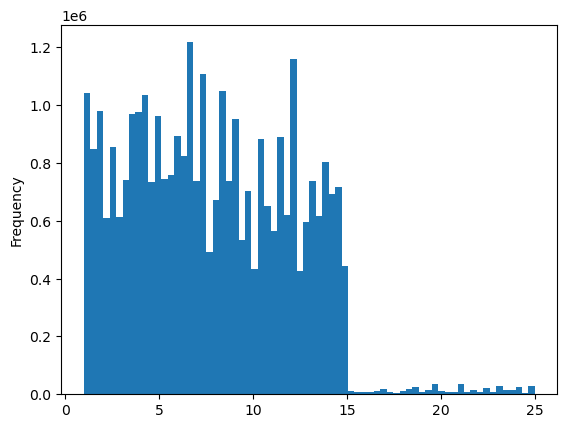

In [38]:
# Increase the number of bins to 70 to see the distribution better
ords_prods_merge["prices"].plot.hist(bins=70)

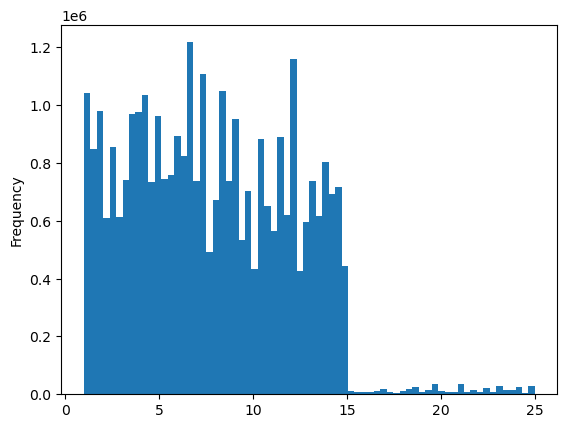

In [39]:
# Export the histogram
hist = ords_prods_merge["prices"].plot.hist(bins=70)
hist.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "hist_prices.png")
)

## Creating Line chart

In this case we dont have a date in the dataframe so it can be difficult ot draw a line chart.
We can though check the development of prices across the days of teh week.


In [41]:
# Create a line chart for the prices column, x axis will orders_day_of_week, y axis will be prices
# first create a subset of the data with 2000000 rows
df = ords_prods_merge[:2000000]

# This will not work, we need to crate a sample of the data


## Sampling Data

For a 70/30 split sample.

np.random.seed(4) <br>
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

### Seed
The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible. <br>

### Dev
Create a list that will store the boolean value 

### Recap
* Set the seed for the random number generator.
* Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
* Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
* Store the results of the test in a new list, dev, in the form of boolean values (True and False).


In [45]:
# execute the code
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

# np.random.rand() generates random numbers between 0 and 1
# np stand for numpy
# random is the function that generates random numbers
# rand is the method that generates random numbers following a uniform distribution
# len(ords_prods_merge) returns the number of rows in the dataframe

In [44]:
# check the list result
dev

array([False,  True, False, ...,  True,  True,  True])

In [48]:
# No2 cerate the samples
big = ords_prods_merge[dev]  # every row that is true will be assigned to big


In [49]:
small = ords_prods_merge[~dev]  # every row that is false will be assigned to small

In [52]:
# check the length of the samples, if they are the same = true
len(ords_prods_merge) == len(big) + len(small)

True

In [53]:
# Now reduce the sample to only necessary columns orders_day_of_week and prices
df_2 = small[["orders_day_of_week", "prices"]]

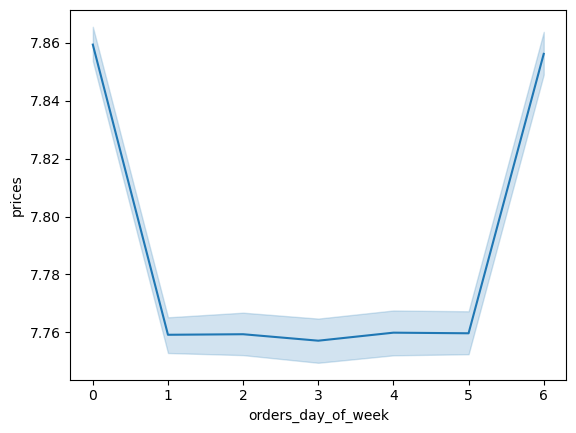

In [54]:
# create the line chart
line = sns.lineplot(data=df_2, x="orders_day_of_week", y="prices")

In [58]:
# Lets try to cmpare it with the full database

# df_3 = ords_prods_merge[["orders_day_of_week", "prices"]]
# line = sns.lineplot(data=df_3, x="orders_day_of_week", y="prices")

# or with the big sample

# df_4 = big[["orders_day_of_week", "prices"]]
# line = sns.lineplot(data=df_4, x="orders_day_of_week", y="prices")

In [57]:
# Export the line chart
line.figure.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "line_prices_dow.png")
)